In [48]:
import pandas as pd
path = 'data/datasets.csv'
data = pd.read_csv(path)

In [49]:
# 잘 load 되었는지 확인
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [50]:
data.columns, len(data.columns)

(Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 35)

In [51]:
# 무의미한 값 drop
data = data.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [52]:
data['Attrition'] = data['Attrition'].map({'Yes':1,'No':0})
data['OverTime'] = data['OverTime'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

data['BusinessTravel'] = data['BusinessTravel'].map({
    'Travel_Rarely':2,
    'Travel_Frequently':3,
    'Non-Travel':4
})

data['MaritalStatus'] = data['MaritalStatus'].map({
    'Single':2,
    'Married':3,
    'Divorced':4
})

data['Department'] = data['Department'].map({
    'Sales':2,
    'Human Resources':3,
    'Research & Development':4
})

data['EducationField'] = data['EducationField'].map({
    'Life Sciences':2,
    'Medical':3,
    'Marketing':4,
    'Technical Degree':2,
    'Human Resources':3,
    'Other': 4
})

data['JobRole'] = data['JobRole'].map({
    'Sales Executive':2,
    'Manufacturing Director':3,
    'Healthcare Representative':4,
    'Manager':2,
    'Research Director':3,
    'Laboratory Technician':4,
    'Sales Representative':2,
    'Research Scientist':3,
    'Human Resources':4
})

In [53]:
data = data.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [54]:
#normalizing 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = data.drop(columns=['Attrition'])
norm = scaler.fit_transform(data)
norm_df = pd.DataFrame(norm,columns=data.columns)

In [55]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2, random_state = 0)

In [57]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [58]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 13)

In [59]:
#### XGBoost classifier

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
scoring_list = ['accuracy','recall','f1']
scoring = scoring_list[0]

import numpy as np

xgb_clf = XGBClassifier()
xgb_clf.fit(smote_train, smote_target)

xgb_predictions = xgb_clf.predict(X_test)
print('accuracy',metrics.accuracy_score(y_test, xgb_predictions))

import pickle
with open('xgb.pkl','wb') as f:
    pickle.dump(xgb_clf,f)

accuracy 0.9625850340136054


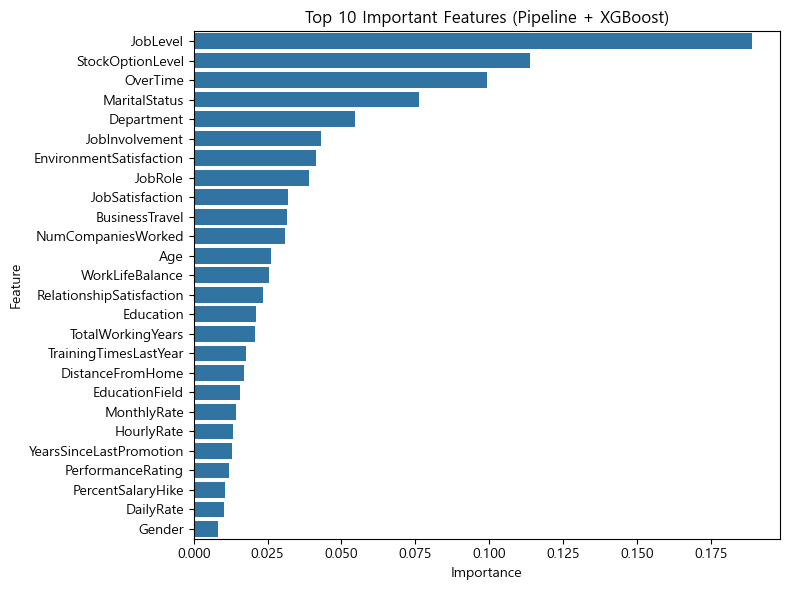

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. feature importance
importances = xgb_clf.feature_importances_

# 4. 중요도 매핑
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 5. 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=coef_df)
plt.title("Top 10 Important Features (Pipeline + XGBoost)")
plt.savefig("pipeline+xgb.png")
plt.tight_layout()
plt.show()

In [65]:
coef_df

,Feature,Importance
11,JobLevel,0.188998
21,StockOptionLevel,0.113762
17,OverTime,0.099303
14,MaritalStatus,0.076323
3,Department,0.054445
10,JobInvolvement,0.043135
7,EnvironmentSatisfaction,0.041354
12,JobRole,0.039059
13,JobSatisfaction,0.031821
1,BusinessTravel,0.031665
